In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


pd.set_option('display.float_format', '{:.3f}'.format)


In [3]:
da = pd.read_csv('/content/drive/My Drive/potus_visitors_2015.csv')
da

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description
0,Joshua T. Blanton,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
1,Jack T. Gutting,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
2,Bradley T. Guiles,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
3,Loryn F. Grieb,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
4,Travis D. Gordon,2014-12-18T00:00:00,1/6/15 9:30,1/6/15 23:59,NaN,potus,west wing,JointService Military Honor Guard
...,...,...,...,...,...,...,...,...
47949,William B. Henline,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47950,Ian T. Burris,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47951,James F. Albaugh,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN
47952,Jackie L. Finken,2015-12-16T00:00:00,12/18/15 16:30,12/18/15 23:59,NaN,POTUS/FLOTUS,State Floo,NaN


In [4]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47954 entries, 0 to 47953
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               47954 non-null  object
 1   appt_made_date     47954 non-null  object
 2   appt_start_date    47954 non-null  object
 3   appt_end_date      47954 non-null  object
 4   visitee_namelast   6069 non-null   object
 5   visitee_namefirst  47953 non-null  object
 6   meeting_room       47954 non-null  object
 7   description        8053 non-null   object
dtypes: object(8)
memory usage: 2.9+ MB


In [5]:
# convert data and time string columns to datetime objects
#appt_made_date
da['appt_made_date'] = pd.to_datetime(da['appt_made_date'], format='%Y-%m-%dT%H:%M:%S')
da['appt_made_date']

0       2014-12-18
1       2014-12-18
2       2014-12-18
3       2014-12-18
4       2014-12-18
           ...    
47949   2015-12-16
47950   2015-12-16
47951   2015-12-16
47952   2015-12-16
47953   2015-12-16
Name: appt_made_date, Length: 47954, dtype: datetime64[ns]

In [6]:
#appt_start_date
da['appt_start_date'] = pd.to_datetime(da['appt_start_date'], format='%m/%d/%y %H:%M')
da['appt_start_date']

0       2015-01-06 09:30:00
1       2015-01-06 09:30:00
2       2015-01-06 09:30:00
3       2015-01-06 09:30:00
4       2015-01-06 09:30:00
                ...        
47949   2015-12-18 16:30:00
47950   2015-12-18 16:30:00
47951   2015-12-18 16:30:00
47952   2015-12-18 16:30:00
47953   2015-12-18 16:30:00
Name: appt_start_date, Length: 47954, dtype: datetime64[ns]

In [7]:
#appt_end_date
da['appt_end_date'] = pd.to_datetime(da['appt_end_date'], format='%m/%d/%y %H:%M')
da['appt_end_date']

0       2015-01-06 23:59:00
1       2015-01-06 23:59:00
2       2015-01-06 23:59:00
3       2015-01-06 23:59:00
4       2015-01-06 23:59:00
                ...        
47949   2015-12-18 23:59:00
47950   2015-12-18 23:59:00
47951   2015-12-18 23:59:00
47952   2015-12-18 23:59:00
47953   2015-12-18 23:59:00
Name: appt_end_date, Length: 47954, dtype: datetime64[ns]

In [8]:
# Extract the months appoinments were created
#da['appt_made_month']=da['appt_made_date'].dt.month   this returns numbers
da['appt_made_month']=da['appt_made_date'].dt.strftime('%B')
da['appt_made_month']

0        December
1        December
2        December
3        December
4        December
           ...   
47949    December
47950    December
47951    December
47952    December
47953    December
Name: appt_made_month, Length: 47954, dtype: object

In [9]:
# Extract the months appoinments were fulfilled
#da['appt_made_month']=da['appt_made_date'].dt.month   this returns numbers
da['appt_start_month']=da['appt_start_date'].dt.strftime('%B')
da['appt_start_month']

0         January
1         January
2         January
3         January
4         January
           ...   
47949    December
47950    December
47951    December
47952    December
47953    December
Name: appt_start_month, Length: 47954, dtype: object

In [10]:
#find the time each appointment lasted
da['appt_duration_hours']=(da['appt_end_date']-da['appt_start_date']).dt.total_seconds() / 3600
da['appt_duration_hours']

0       14.483
1       14.483
2       14.483
3       14.483
4       14.483
         ...  
47949    7.483
47950    7.483
47951    7.483
47952    7.483
47953    7.483
Name: appt_duration_hours, Length: 47954, dtype: float64

In [11]:
da.head()

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description,appt_made_month,appt_start_month,appt_duration_hours
0,Joshua T. Blanton,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483
1,Jack T. Gutting,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483
2,Bradley T. Guiles,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483
3,Loryn F. Grieb,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483
4,Travis D. Gordon,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483


In [12]:
# identify time of day for each appointment start time

conditions = [
    (da['appt_start_date'].dt.hour >= 0) & (da['appt_start_date'].dt.hour < 12),
    (da['appt_start_date'].dt.hour >= 12) & (da['appt_start_date'].dt.hour < 18),
    (da['appt_start_date'].dt.hour >= 18) & (da['appt_start_date'].dt.hour < 24)
]

categories = ['Morning', 'Afternoon', 'Evening']


da['time_of_day'] = np.select(conditions, categories, default='Unknown')

da['time_of_day'].unique()




array(['Morning', 'Afternoon', 'Evening'], dtype=object)

In [13]:
da.head()

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description,appt_made_month,appt_start_month,appt_duration_hours,time_of_day
0,Joshua T. Blanton,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
1,Jack T. Gutting,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
2,Bradley T. Guiles,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
3,Loryn F. Grieb,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
4,Travis D. Gordon,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning


In [14]:
# Examining appt_duration_hours for data quality issues
da.appt_duration_hours.describe()

count   47954.000
mean       10.615
std        18.130
min         2.483
25%         7.233
50%         9.233
75%        11.483
max       396.983
Name: appt_duration_hours, dtype: float64

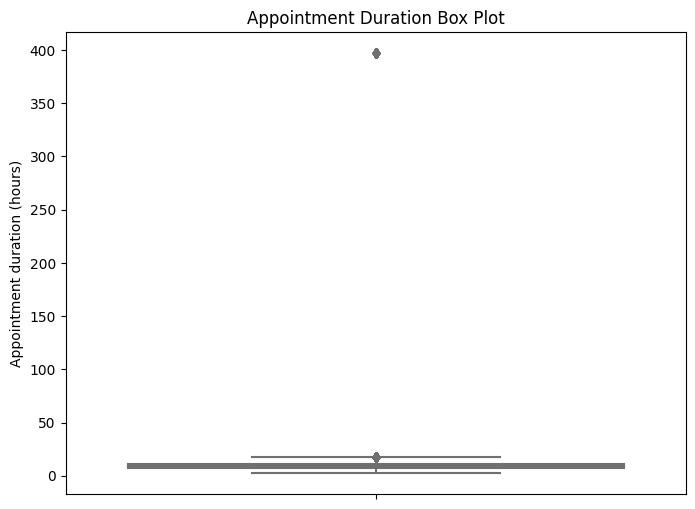

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=da, y='appt_duration_hours', color='skyblue')
plt.ylabel('Appointment duration (hours)')
plt.title('Appointment Duration Box Plot')
plt.show()

In [16]:
#examining outliers
da['appt_duration_hours'][da['appt_duration_hours'] > 20].value_counts()

396.983    102
Name: appt_duration_hours, dtype: int64

In [17]:
da[da['appt_duration_hours'] > 20]

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description,appt_made_month,appt_start_month,appt_duration_hours,time_of_day
34925,Regino B. Madrid,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
34926,Glenn A. Dewey,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
34927,Matthew J. Harding,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
34928,Marquez D. Brown,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
34929,Mark A. Questad,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
35022,Jeffrey M. Strouf,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
35023,Juan P. Montoya,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
35024,Joseph F. LeBlanc,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning
35025,Julio C. Tejedamotos,2015-12-01,2015-12-02 11:00:00,2015-12-18 23:59:00,NaN,POTUS,State Floo,NaN,December,December,396.983,Morning


In [18]:
da=da[da['appt_duration_hours'] < 20]
da

,name,appt_made_date,appt_start_date,appt_end_date,visitee_namelast,visitee_namefirst,meeting_room,description,appt_made_month,appt_start_month,appt_duration_hours,time_of_day
0,Joshua T. Blanton,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
1,Jack T. Gutting,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
2,Bradley T. Guiles,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
3,Loryn F. Grieb,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
4,Travis D. Gordon,2014-12-18,2015-01-06 09:30:00,2015-01-06 23:59:00,NaN,potus,west wing,JointService Military Honor Guard,December,January,14.483,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
47949,William B. Henline,2015-12-16,2015-12-18 16:30:00,2015-12-18 23:59:00,NaN,POTUS/FLOTUS,State Floo,NaN,December,December,7.483,Afternoon
47950,Ian T. Burris,2015-12-16,2015-12-18 16:30:00,2015-12-18 23:59:00,NaN,POTUS/FLOTUS,State Floo,NaN,December,December,7.483,Afternoon
47951,James F. Albaugh,2015-12-16,2015-12-18 16:30:00,2015-12-18 23:59:00,NaN,POTUS/FLOTUS,State Floo,NaN,December,December,7.483,Afternoon
47952,Jackie L. Finken,2015-12-16,2015-12-18 16:30:00,2015-12-18 23:59:00,NaN,POTUS/FLOTUS,State Floo,NaN,December,December,7.483,Afternoon


# Visualizing key data

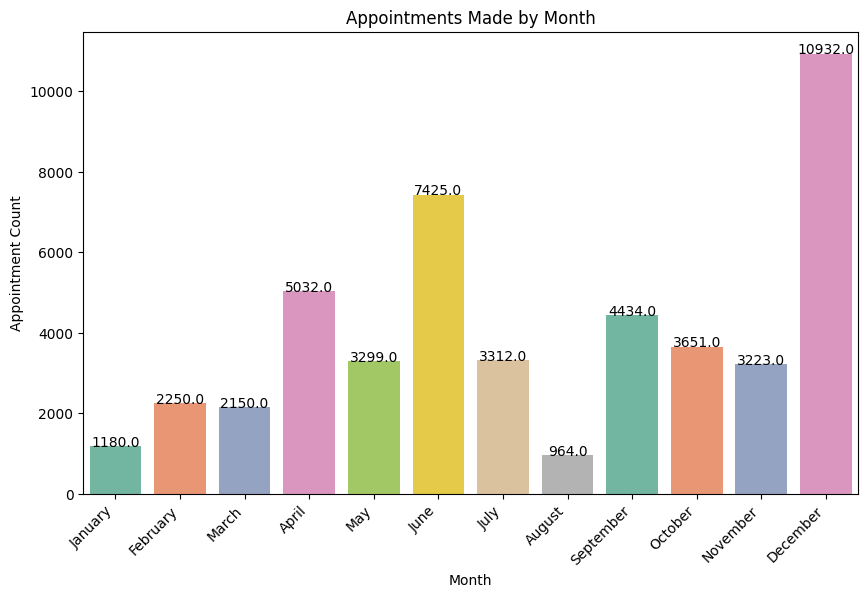

In [19]:
# number appointments made per month

plt.figure(figsize=(10, 6))  # Optional: adjust the figure size
ax = sns.countplot(data=da, x='appt_made_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='Set2')
plt.xlabel('Month')
plt.ylabel('Appointment Count')
plt.title('Appointments Made by Month')
plt.xticks(rotation=45, ha='right')

# Add data labels to the plot for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

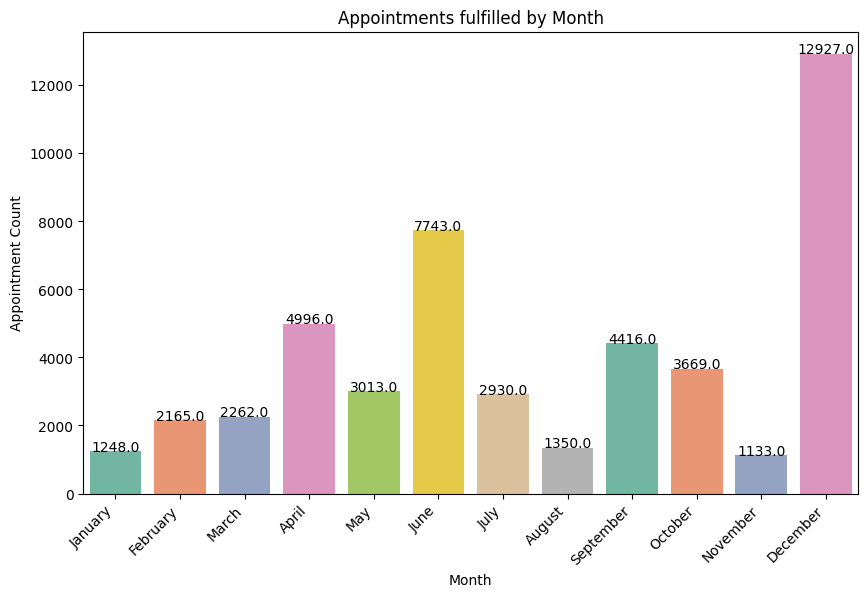

In [20]:
# Appointments fulfilled per month
plt.figure(figsize=(10, 6))
ax=sns.countplot(data=da, x='appt_start_month', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette='Set2')
plt.xlabel('Month')
plt.ylabel('Appointment Count')
plt.title('Appointments fulfilled by Month')
plt.xticks(rotation=45, ha='right')

# Add data labels to the plot for each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

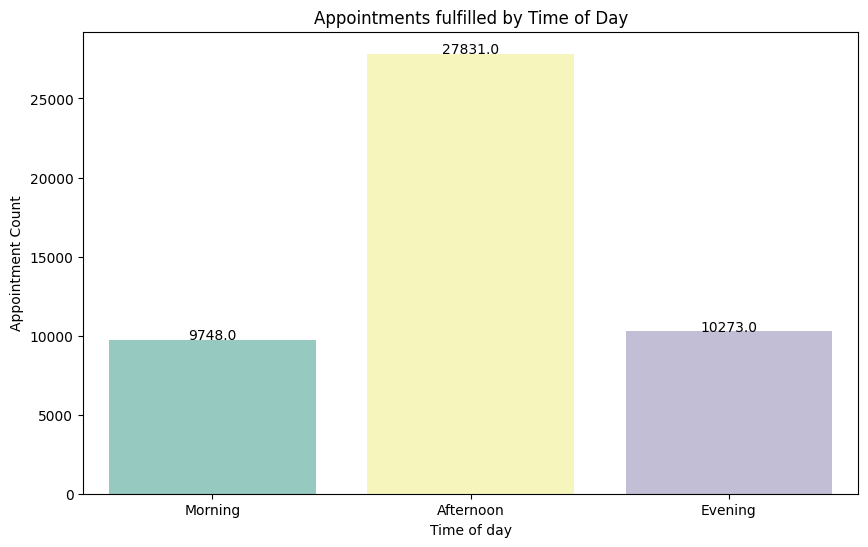

In [21]:
# the time of the day for appoinments

plt.figure(figsize=(10, 6))
ax=sns.countplot(data=da, x='time_of_day', order=['Morning', 'Afternoon', 'Evening'], palette='Set3')
plt.xlabel('Time of day')
plt.ylabel('Appointment Count')
plt.title('Appointments fulfilled by Time of Day')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()


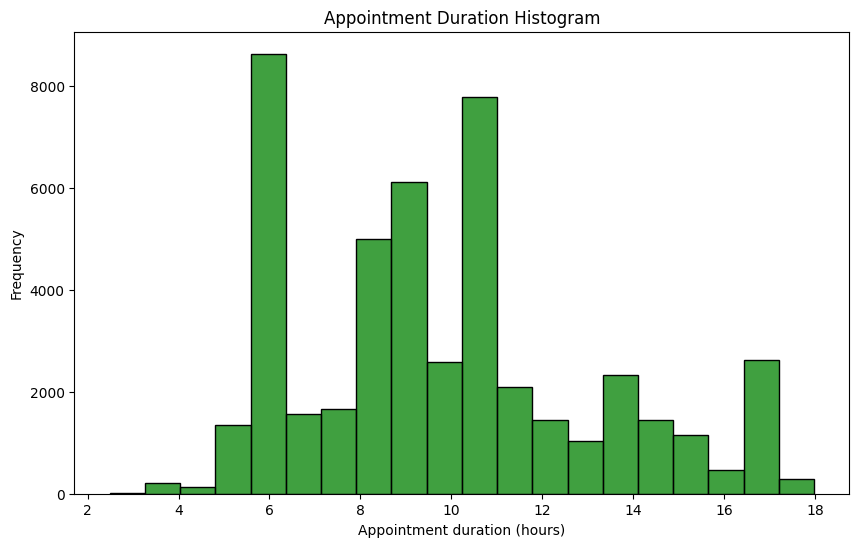

In [22]:
# Distribution of appointment duration

plt.figure(figsize=(10, 6))
sns.histplot(data=da, x='appt_duration_hours', bins=20, color='green',)
plt.xlabel('Appointment duration (hours)')
plt.ylabel('Frequency')
plt.title('Appointment Duration Histogram')
plt.show()





